# Download ERA5 data for METFUT

1. Understand the task: METFUT would like to train ML models on subsets of ERA5 data. For this, we should retrieve snapshots of individual variables on single model levels at 12-hourly resolution. The variable names/ids, model levels, and time ranges will be given to us.
2. Read through the [ERA5 documentation](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-complete?tab=form) to understand the data structure and identify, which data/access point we need.
3. Install the CDS API.
   * For this, we first need to register at [Copernicus Data Store](https://cds.climate.copernicus.eu/user/register?destination=%2F%23!%2Fhome).
   * Next copy and store your API key in file ```$HOME/.cdsapirc```. You find it at the bottom of your personal profile when you are logged in the CDS. Format:
```
url: https://cds.climate.copernicus.eu/api/v2
key: {uid}:{api-key}
```
   *Install the CDS API via ```pip install cdsapi```
   * Read through the [instructions](https://cds.climate.copernicus.eu/api-how-to) on how to use the cdsapi (bottom half of web page))
5.Browse through the [ERA5 data catalogue](https://apps.ecmwf.int/data-catalogues/era5/?class=ea) and select the fields you want to download.
6. After composing your search, click on "Show API request" and copy the commands into your notebook.

Please make sure to limit the download to 5.625 degree resolution and 12-hourly samples! Select Netcdf as output format. 

In [11]:
# install modules
!pip install cdsapi
!pip install xarray

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xarray from https://files.pythonhosted.org/packages/f7/fe/c4d15ac730b2bcdd530e4bc6491958c53237eb573dba4eec3ad31ff0519a/xarray-2024.3.0-py3-none-any.whl.metadata
  Using cached xarray-2024.3.0-py3-none-any.whl.metadata (11 kB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/tljh/user/lib/python3.10/site-packages/numpy-1.25.2.dist-info/METADATA'


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


__Note:__ The following works with the ipynb kernel, but not with the METCLOUD kernel. The first try might raise an error telling you that you must first accept the use conditions (follow the link at the bottom). Thereafter, it should work.

In [1]:
import os
os.getcwd()

'C:\\Users\\blats\\Desktop\\CologneCourses\\Sem4\\ESDP\\esdp1-test'

In [2]:
# Exemplary MARS request after composing through the web interface
# shortened from 1 month to 3 days

import cdsapi

c = cdsapi.Client()
"""
c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01/to/2023-01-31",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "21:00:00",
    "type": "4v"
}, "output")

# if successful, you shall see a new file named ```output``` in your current directory.
"""

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "1998-05-12",
    "expver": "1",
    "levelist": "1/2/3/4/5/6/7/8/9/10/11/12/13/14/15/16/17/18/19/20/21/22/23/24/25/26/27/28/29/30/31/32/33/34/35/36/37/38/39/40/41/42/43/44/45/46/47/48/49/50/51/52/53/54/55/56/57/58/59/60/61/62/63/64/65/66/67/68/69/70/71/72/73/74/75/76/77/78/79/80/81/82/83/84/85/86/87/88/89/90/91/92/93/94/95/96/97/98/99/100/101/102/103/104/105/106/107/108/109/110/111/112/113/114/115/116/117/118/119/120/121/122/123/124/125/126/127/128/129/130/131/132/133/134/135/136/137",
    "levtype": "ml",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00",
    "type": "4v"
}, "output")

2024-05-01 13:42:49,906 INFO Welcome to the CDS
2024-05-01 13:42:49,906 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-01 13:42:50,031 INFO Request is queued
2024-05-01 13:42:51,073 INFO Request is running
2024-05-01 13:42:52,607 INFO Request is completed
2024-05-01 13:42:52,607 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data6/adaptor.mars.external-1714563771.06067-14270-19-0d9c7424-29af-430c-8b0a-ee8f54584117.grib to output (107.5M)


KeyboardInterrupt: 

## Customize requests 
Now, we need to modify the request to obtain what we really want:
* time 09:00 and 21:00
* 5.625 degree resolution
* Netcdf output

Check the [Guidelines for efficient MARS requests](https://confluence.ecmwf.int/display/UDOC/Guidelines+to+write+efficient+MARS+requests) how to make these modifications.

Question: how to use "list" and "output = cost" in cdsapi?

See also [MARS user documentation](https://confluence.ecmwf.int/display/UDOC/MARS+user+documentation)

From efficiency guide: loop structure should be
```
date (outer loop)
   time
      step
         number (EPS only)
            level
               parameter (inner loop)
```
Try to issue the MARS request at the highest level possible.

In [77]:
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00",
    "type": "4v",
    "format": "netcdf"
}, "ERA5_surface.nc")



2024-05-01 15:13:07,444 INFO Welcome to the CDS
2024-05-01 15:13:07,444 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-05-01 15:13:07,659 INFO Request is queued
2024-05-01 15:13:08,701 INFO Request is running
2024-05-01 15:13:10,245 INFO Request is completed
2024-05-01 15:13:10,246 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/adaptor.mars.external-1714569189.6473022-3669-7-323f7126-1b42-45f9-84d6-4ad3f773b4c5.nc to ERA5_surface.nc (5.6K)
2024-05-01 15:13:10,475 INFO Download rate 24.6K/s                                                                     


Result(content_length=5720,content_type=application/x-netcdf,location=https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/adaptor.mars.external-1714569189.6473022-3669-7-323f7126-1b42-45f9-84d6-4ad3f773b4c5.nc)

In [6]:
#ncdump -t -v latitude,longitude,time test.nc
# shows that this worked fine.
#import netcdf4

SyntaxError: invalid syntax (Temp/ipykernel_24388/882191059.py, line 1)

In [83]:
#https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
# conda install -c conda-forge xarray dask netCDF4 bottleneck
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4

from cartopy import config
import cartopy.crs as ccrs

Assignment - convert from one grid to another temperature for one day 
            -visualize
    

In [35]:
data = xr.open_dataset("ERA5_surface.nc")
data

temp = data['t']
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

temp

<xarray.DataArray 't' (time: 1, latitude: 33, longitude: 64)>
[2112 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature

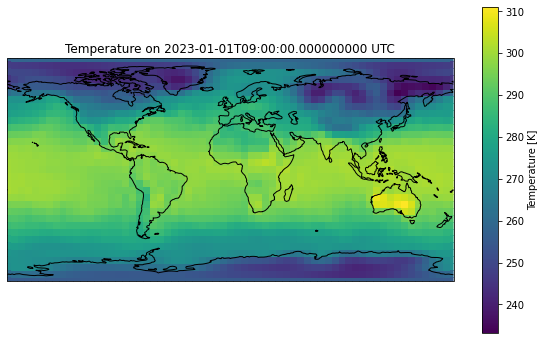

In [39]:

import warnings
warnings.simplefilter('ignore')

# https://dwikita-ichsana.medium.com/meteorology-101-how-to-download-and-plot-meteorological-data-from-era5-dcbf12553d6a
# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
## load netcdf data
data = xr.open_dataset("ERA5_surface.nc")
data

#temp = data.variables['t'][0, :, :]
temp = data['t']
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]

## plot
#ax = plt.axes(projection=ccrs.PlateCarree())

#plt.contourf(lon, lat, temp, 60,
#             transform=ccrs.PlateCarree())

#ax.coastlines()

#plt.show()

## plot 2
# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temp.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temp.min(),
                                                     vmax=temp.max())

# Add coastlines
ax.coastlines()


# Add title
plt.title('Temperature on {} UTC'.format(temp.time.values[0]))

# Show the plot
plt.show()





## Import ICON grid file and convert

In [42]:
## download icon grid file from http://icon-downloads.mpimet.mpg.de/dwd_grids.xml#grid8
## grid type Global R02B05 grid. 80 km resolution

import netCDF4 as nc

filename = "icon_grid_0008_R02B05_G.nc"

# Open the NetCDF file
with nc.Dataset(filename, "r") as nc_file:
    # Access the data or metadata as needed
    print(nc_file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    title: ICON grid description
    history: /e/uhome/dreinert/icon/build/sx9
    institution: Max Planck Institute for Meteorology/Deutscher Wetterdienst
    source: icon-dev
    uuidOfHGrid: 0df795de-1dce-11b2-8c3f-4f045d5627af
    number_of_grid_used: 8
    ICON_grid_file_uri: http://icon-downloads.mpimet.mpg.de/grids/public/icon_grid_0008_R02B05_G.nc
    centre: 78
    subcentre: 255
    outname_style: 2
    grid_mapping_name: lat_long_on_sphere
    crs_id: urn:ogc:def:cs:EPSG:6.0:6422
    crs_name: Spherical 2D Coordinate System
    ellipsoid_name: Sphere
    semi_major_axis: 6371229.0
    inverse_flattening: 0.0
    grid_level: 5
    grid_root: 2
    grid_ID: 1
    parent_grid_ID: 0
    max_childdom: 1
    dimensions(sizes): cell(81920), vertex(40962), edge(122880), nc(2), nv(3), ne(6), no(4), two_grf(2), max_chdom(1), cell_grf(14), edge_grf(24), vert_grf(13), cell_delaunay(1638

## Import CDO package to convert to ICON grid

In [81]:
#!pip install cdo
!conda install -c conda-forge python-cdo

In [86]:
## remap era5 grid to icon
from cdo import *   # python version
cdo = Cdo()

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [77]:

!cdo remapcon,icon_grid_0008_R02B05_G.nc ERA5_surface.nc ERA5_surface_icon_grid.nc

'cdo' is not recognized as an internal or external command,
operable program or batch file.
